In [1]:
import uncertainpy as un
import chaospy as cp                       # To create distributions
import numpy as np                         # For the time array
from scipy.integrate import odeint         # To integrate our equation

import matplotlib.pyplot as plt

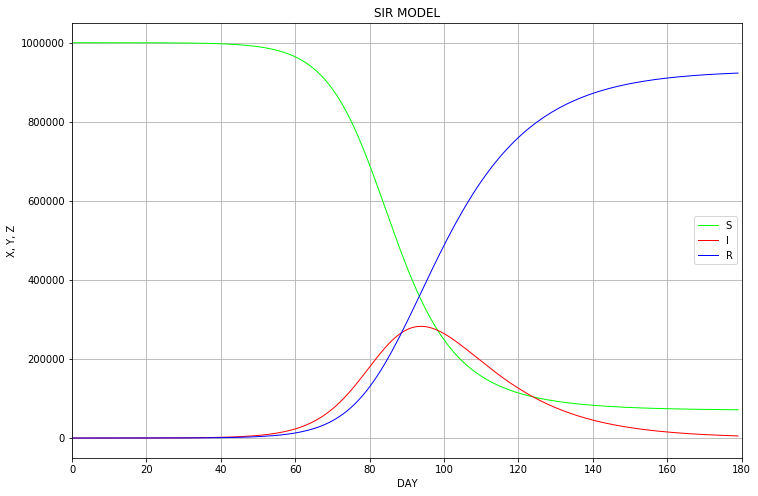

In [5]:
# Create the coffee cup model function
def sir_model(mp, gamma):
    # Initial  and time array
    N = 1000000  # population
    b = mp/N    # propagation rate
    dt = 0.1       # discritized time
    times = np.arange(0.0, 180, dt)

    # The equation describing the model
    def f(v, t, beta):
        x = v[0]
        y = v[1]
        z = v[2]
        dxdt = - beta*x*y
        dydt = beta*x*y - gamma*y
        dzdt = gamma*y
        return [dxdt, dydt, dzdt]

    # Solving the equation by integration
    x, y, z = odeint(f, T_0, time, args=(beta))[:, 0]

    info["y"] = y
    info["z"] = z
    # Return time and model output
    return time, x, info

def sir_model(v, t, beta, gamma):
    x = v[0]
    y = v[1]
    z = v[2]
    dxdt = - beta*x*y
    dydt = beta*x*y - gamma*y
    dzdt = gamma*y
    return [dxdt, dydt, dzdt]

N = 1000000
beta=0.2/N
gamma=0.07
dt=0.1

init_vals=[N-10, 10, 0]
times = np.arange(0.0, 180, dt)
args=(beta, gamma)
results = odeint(sir_model, init_vals, times, args=args)

fig, ax = plt.subplots(1, 1, figsize=(12, 8))
ax.set_title("SIR MODEL")
ax.plot(times[::10],results[::10, 0], color=(0.0,1,0.0), linewidth=1.0, label='S')
ax.plot(times[::10],results[::10, 1], color=(1.0,0,0.0), linewidth=1.0, label='I')
ax.plot(times[::10],results[::10, 2], color=(0.0,0,1.0), linewidth=1.0, label='R')

ax.set_xlim(0,180)
ax.legend()
ax.set_xlabel('DAY')
ax.set_ylabel('X, Y, Z')
ax.grid(True)
plt.show()